In [ ]:
print("Hello ji .. Ki hal chal")

Hello ji .. Ki hal chal


# All Libraries import

In [ ]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


# MTCNN Installation

In [ ]:
pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.3 MB/s eta 0:00:00


In [ ]:
from mtcnn import MTCNN

## MTCNN Crop function

In [ ]:
def crop_face(image_path):
    # Load the image
    image = cv.imread(image_path)
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Create an MTCNN detector
    detector = MTCNN()

    # Detect faces in the image
    faces = detector.detect_faces(image_rgb)

    # Ensure only one face is detected
    if len(faces) != 1:
        print("Error: Expected 1 face but found", len(faces))
        return None

    # Extract the bounding box coordinates
    x, y, w, h = faces[0]['box']

    # Ensure the bounding box coordinates are within the image dimensions
    x1, y1 = max(x, 0), max(y, 0)
    x2, y2 = min(x + w, image.shape[1]), min(y + h, image.shape[0])

    # Crop the image using the bounding box coordinates
    cropped_image = image[y1:y2, x1:x2]
    return cropped_image


In [ ]:
image1 = '/content/katherine-Copy.jpg'
image2 = '/content/katherine-langford.jpg'
cropped_image1 = crop_face(image1)
cropped_image2 = crop_face(image2)

if cropped_image1 is None or cropped_image2 is None:
  print("Face not found in the image")
print("Face extraction successfull..")

1/1 [==============================] - 0s 278ms/step
Face extraction successfull..


## SIFT model with Cosine similarity

In [ ]:
import cv2

def extract_features(image_path):
    # image = cv2.imread(image_path)
    image = image_path
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.ORB_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return descriptors

image1_features = extract_features(cropped_image1)
image2_features = extract_features(cropped_image2)
# cropped_image1 = crop_face(image1)
# cropped_image2 = crop_face(image2)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Resize feature vectors to a fixed length
max_length = max(len(image1_features), len(image2_features))
image1_features_resized = np.pad(image1_features, ((0, max_length - len(image1_features)), (0, 0)), mode='constant')
image2_features_resized = np.pad(image2_features, ((0, max_length - len(image2_features)), (0, 0)), mode='constant')

# Calculate the cosine similarity
cos_sim = cosine_similarity(image1_features_resized, image2_features_resized)[0][0]
# # Calculate the cosine similarity
# cos_sim = cosine_similarity(image1_features, image2_features)[0][0]


In [ ]:
print(F'Similarity match index: {round(cos_sim,5)}')

Similarity match index: 0.8801


## SIFT Implementation

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/IMG20240207225818.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
print("Image with keypoints")
cv2_imshow( image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Image with keypoints


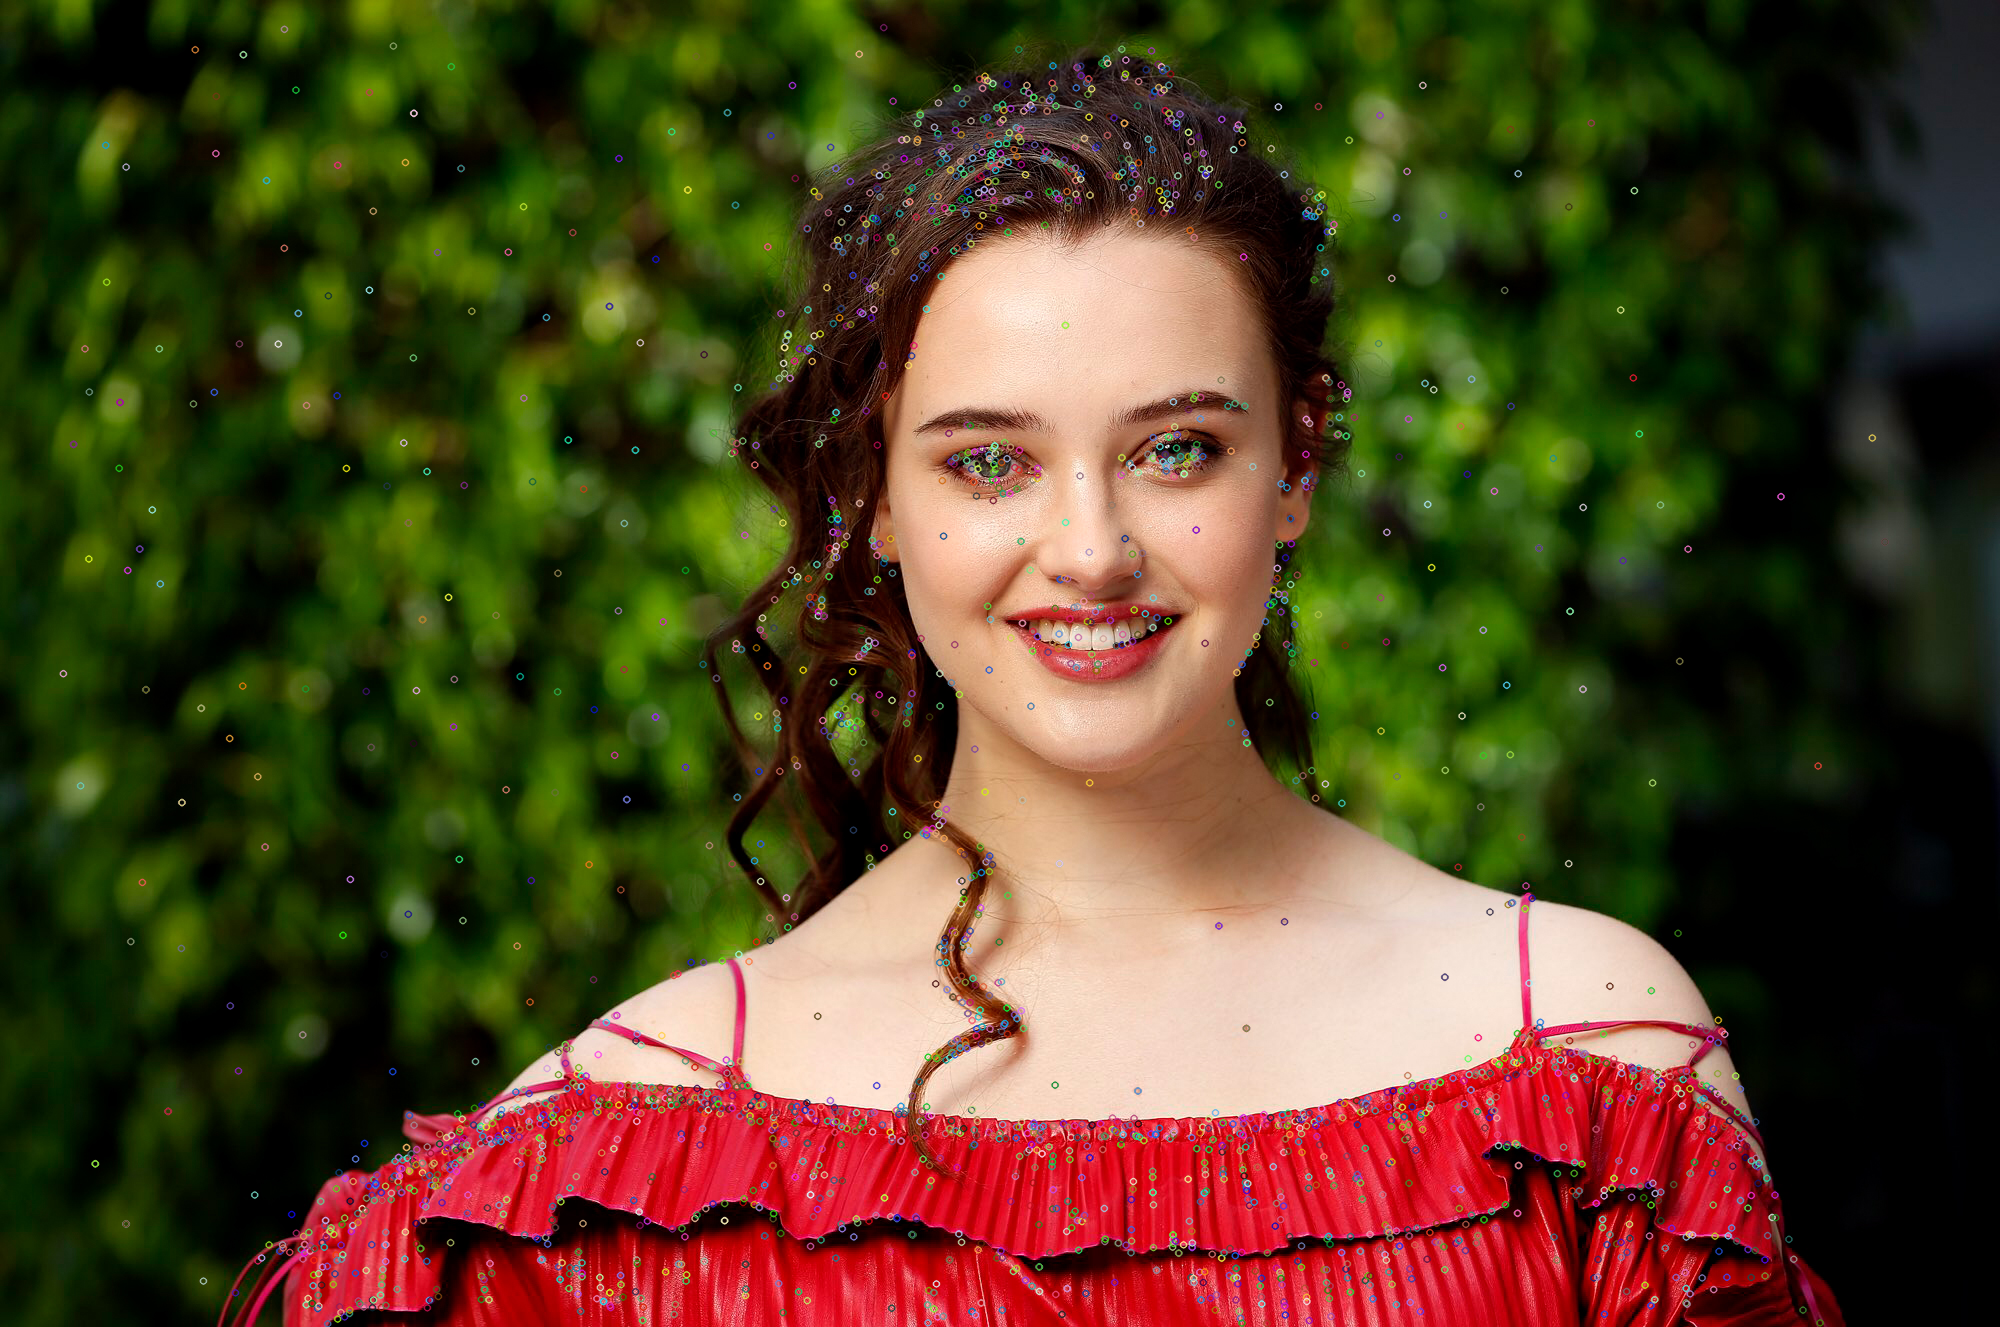

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/katherine-Copy.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


sift = cv2.SIFT_create();
# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
print("Image with keypoints")
cv2_imshow( image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/katherine-Copy.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create an MTCNN detector
detector = MTCNN()

# Detect faces in the image
faces = detector.detect_faces(image_rgb)
# print("Displaying the detected face in the image")
# Display the detected faces
for face in faces:
    x, y, w, h = face['box']
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the cropped images surrounded by bounding boxes
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()

1/1 [==============================] - 0s 434ms/step


1/1 [==============================] - 0s 163ms/step


Display the cropped images surrounded by bounding boxes


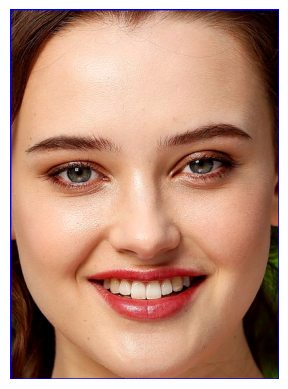

In [ ]:
print("Display the cropped images surrounded by bounding boxes")
img = image
for face in faces:
    x, y, w, h = face['box']
    # Ensure the bounding box coordinates are within the image dimensions
    x1, y1 = max(x, 0), max(y, 0)
    x2, y2 = min(x + w, image.shape[1]), min(y + h, image.shape[0])
    # Crop the image using the bounding box coordinates
    cropped_image = image[y1:y2, x1:x2]
    img = cropped_image
    # Display the cropped image with bounding box
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## Implementation of BFMatcher

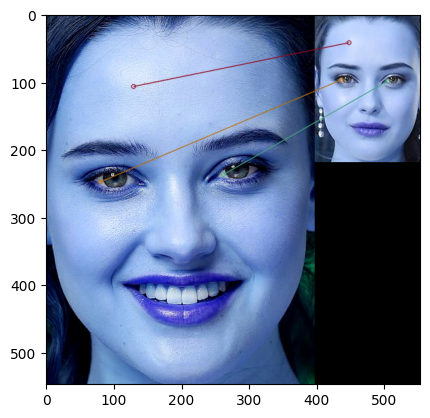

(<matplotlib.image.AxesImage at 0x7f1c1f5ac490>, None)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#loading the images
# img1 = cv2.imread('/content/katherine image2.jpeg')
img1 = cropped_image1
img1_greyscale = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# img2 = cv2.imread('/content/katherine-Copy.jpg')
img2 = cropped_image2
img2_greyscale = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#Initiate SIFT object
sift = cv2.SIFT_create()
# sift.setEdgeThreshold(10)
# sift.setSigma(1.5)
# sift.setContrastThreshold(0.4)

#Detection of keypoints and descriptors
kp1, desp1 = sift.detectAndCompute(img1_greyscale, None)
kp2, desp2 = sift.detectAndCompute(img2_greyscale, None)

# BFmatcher with default parameters
bf = cv2.BFMatcher_create()

matches = bf.knnMatch(desp1,desp2,k=2)

# Apply ratio test
good = []
for m,n in matches:
 if m.distance < 0.5*n.distance:
  good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [ ]:
percentage_good_matches = len(good) / min(len(kp1), len(kp2)) * 100

print("Percentage of good matches:", percentage_good_matches)


Percentage of good matches: 2.7522935779816518


# FLANN based Matcher

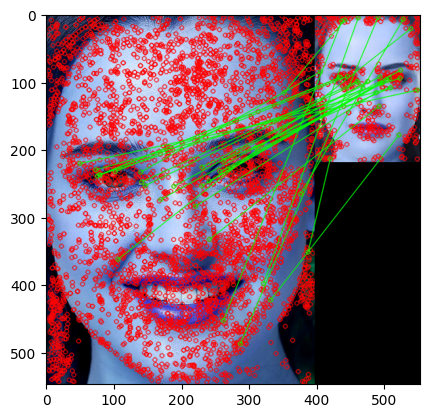

(<matplotlib.image.AxesImage at 0x7f1c1f5ae530>, None)

In [ ]:
# Initiate SIFT detector
sift = cv.SIFT_create()
sift.setEdgeThreshold(15)
sift.setSigma(1.1)
sift.setContrastThreshold(0.01)
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1_greyscale,None)
kp2, des2 = sift.detectAndCompute(img2_greyscale,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 2
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 15)
search_params = dict(checks=100000) # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
 if m.distance < 0.7*n.distance:
  matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
 singlePointColor = (255,0,0),
 matchesMask = matchesMask,
 flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

In [ ]:
good_matches = [m for m, n in matches if m.distance < 0.7* n.distance]

# Calculate the match percentage
match_percentage = (len(good_matches) / min(len(kp1), len(kp2))) * 100

print("Match percentage:", match_percentage)

Match percentage: 5.894736842105263
